## Statements:
>the more subscribers the higher the rating

>rating rating might always be higher in some of the categories




# Import Essential Libraries

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Data Preparation

In [64]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('Course_info.csv')
#select equired columns
SubCatPaid_raw = pd.DataFrame(rawcoursedata[['avg_rating','num_subscribers','subcategory','price','category']][rawcoursedata['price'] != 0])
# Convert all Variable Names to UPPERCASE
SubCatPaid_raw.columns = SubCatPaid_raw.columns.str.upper()
# To add suicide_rate column for prediction ('High' and 'Low')
SubCatPaid_raw['AVG_RATING'] = np.where(SubCatPaid_raw['AVG_RATING']>4, 'High', 'Low')
SubCatPaid_raw

,AVG_RATING,NUM_SUBSCRIBERS,SUBCATEGORY,PRICE,CATEGORY
0,Low,2231.0,Food & Beverage,24.99,Lifestyle
2,High,1713.0,Other Lifestyle,19.99,Lifestyle
3,High,4988.0,Pet Care & Training,199.99,Lifestyle
4,High,1266.0,Web Design,159.99,Design
5,High,20505.0,Yoga,29.99,Health & Fitness
...,...,...,...,...,...
209729,Low,3.0,Language Learning,19.99,Teaching & Academics
209730,Low,0.0,IT Certifications,49.99,IT & Software
209731,Low,0.0,IT Certifications,49.99,IT & Software
209732,Low,0.0,Other Finance & Accounting,119.99,Finance & Accounting


### remove outliers

<class 'str'>, NUM_SUBSCRIBERS => 20.0, 1065.0
[NUM_SUBSCRIBERS] total outliers: 28237
<class 'str'>, PRICE => 19.99, 109.99
[PRICE] total outliers: 10888


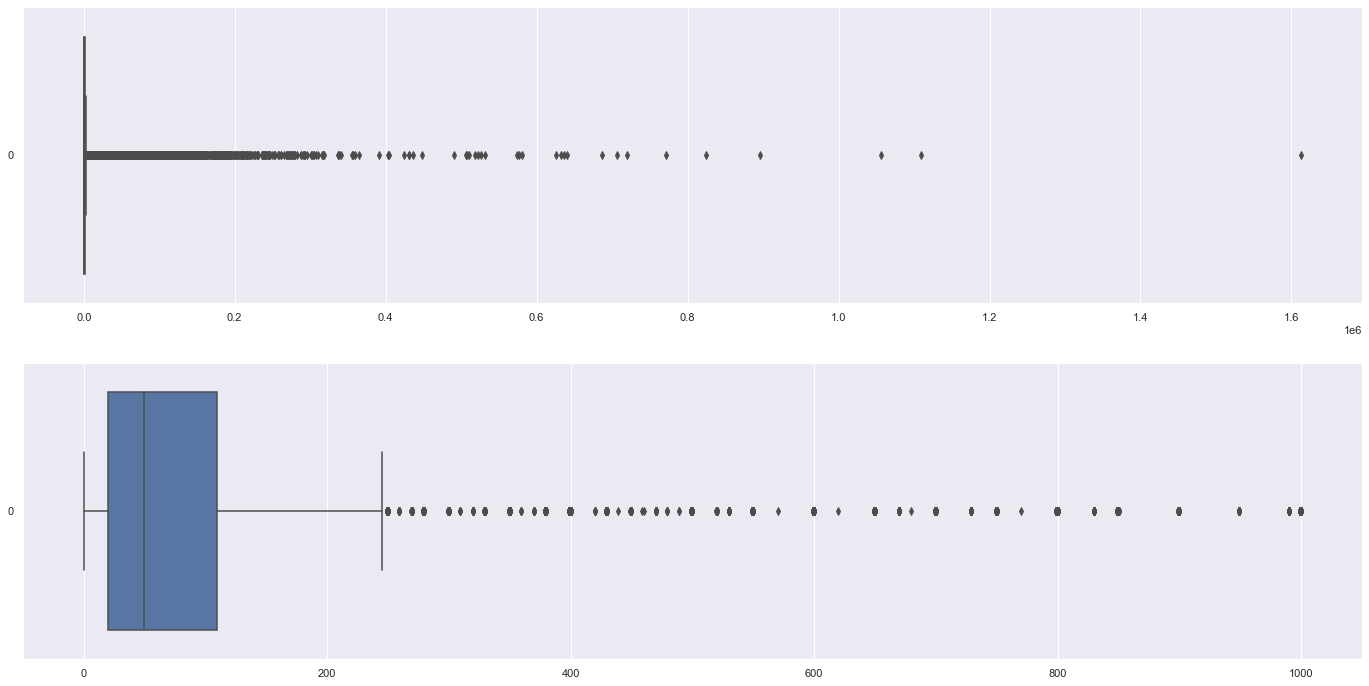

In [65]:
    f, axes = plt.subplots(2, 1, figsize=(24, 12))
    # Draw the Boxplots 
    sb.boxplot(data = SubCatPaid_raw.NUM_SUBSCRIBERS, orient = "h", ax = axes[0])
    sb.boxplot(data = SubCatPaid_raw.PRICE, orient = "h", ax = axes[1])

    column= 'NUM_SUBSCRIBERS'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    
    column= 'PRICE'
    column_data: pd.DataFrame = SubCatPaid_raw[column]
    q1 = column_data.quantile(0.25)
    q3 = column_data.quantile(0.75)
    interquartile_range = q3-q1
    print(f"{type(column)}, {column} => {q1}, {q3}")
    lower_whisker = q1-1.5*interquartile_range
    upper_whisker = q3+1.5*interquartile_range
    outliers = sum( (column_data < lower_whisker) | (column_data > upper_whisker) )
    print(f"[{column}] total outliers: { outliers }")
    

In [66]:
q1 = SubCatPaid_raw.quantile(0.25)
q3 = SubCatPaid_raw.quantile(0.75)
interquartile_range = q3-q1

lower_whisker = q1-1.5*interquartile_range
upper_whisker = q3+1.5*interquartile_range

outliers = ((SubCatPaid_raw < lower_whisker) | (SubCatPaid_raw > upper_whisker)).any(axis=1)
SubCatPaid_cleanup: pd.DataFrame = SubCatPaid_raw[~outliers]
print(f"Union outliers: {sum(outliers)}")
SubCatPaid_cleanup.head

Union outliers: 38024


<bound method NDFrame.head of        AVG_RATING  NUM_SUBSCRIBERS                 SUBCATEGORY   PRICE  \
0             Low           2231.0             Food & Beverage   24.99   
2            High           1713.0             Other Lifestyle   19.99   
4            High           1266.0                  Web Design  159.99   
9            High            483.0  Search Engine Optimization   99.99   
10           High            794.0            Teacher Training   49.99   
...           ...              ...                         ...     ...   
209729        Low              3.0           Language Learning   19.99   
209730        Low              0.0           IT Certifications   49.99   
209731        Low              0.0           IT Certifications   49.99   
209732        Low              0.0  Other Finance & Accounting  119.99   
209733        Low              0.0           IT Certifications   49.99   

                    CATEGORY  
0                  Lifestyle  
2                  

In [67]:
SubCatPaid_cleanup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149972 entries, 0 to 209733
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AVG_RATING       149972 non-null  object 
 1   NUM_SUBSCRIBERS  149972 non-null  float64
 2   SUBCATEGORY      149972 non-null  object 
 3   PRICE            149972 non-null  float64
 4   CATEGORY         149972 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.9+ MB


# Classification tree

In [84]:
# Import the necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
master_cat = SubCatPaid_cleanup[['SUBCATEGORY','CATEGORY']]
ohe.fit(master_cat)
master_cat_ohe = pd.DataFrame(ohe.transform(master_cat).toarray(), 
                                  columns=ohe.get_feature_names(master_cat.columns))
#master_cat_ohe = pd.get_dummies(master_cat, columns=['SUBCATEGORY', 'CATEGORY'])

# Check the encoded variables
master_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149972 entries, 0 to 149971
Columns: 143 entries, SUBCATEGORY_3D & Animation to CATEGORY_Teaching & Academics
dtypes: float64(143)
memory usage: 163.6 MB


In [89]:
SubCatPaid_cleanup['PRICE']=SubCatPaid_cleanup['PRICE'].astype(np.int64)

<ipython-input-89-726544e78dcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SubCatPaid_cleanup['PRICE']=SubCatPaid_cleanup['PRICE'].astype(np.int64)


In [90]:
# Combining Numeric features with the OHE Categorical features
masterdata_num = SubCatPaid_cleanup[['NUM_SUBSCRIBERS','PRICE']]
masterdata_res = SubCatPaid_cleanup[['AVG_RATING']]
masterdata_ohe = pd.concat([masterdata_num, master_cat_ohe, masterdata_res], 
                           sort = False, axis = 1).reindex(index=masterdata_num.index)

# Check the final dataframe
masterdata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149972 entries, 0 to 209733
Columns: 146 entries, NUM_SUBSCRIBERS to AVG_RATING
dtypes: float64(145), object(1)
memory usage: 173.2+ MB


In [93]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(masterdata_ohe['AVG_RATING'])
X = pd.DataFrame(masterdata_ohe.drop('AVG_RATING', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns)

C:\Users\Sun Qing\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [97]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Drop rows with missing values
SubCatPaid_cleanup.dropna(inplace=True)

# OneHotEncoding of categorical predictors (not the response)
master_cat = SubCatPaid_cleanup[['SUBCATEGORY','CATEGORY']]
ohe = OneHotEncoder()
master_cat_ohe = pd.DataFrame(ohe.fit_transform(master_cat).toarray(), 
                                  columns=ohe.get_feature_names(master_cat.columns))

# Convert PRICE column to integer type
SubCatPaid_cleanup['PRICE'] = SubCatPaid_cleanup['PRICE'].astype(int)

# Combining Numeric features with the OHE Categorical features
masterdata_num = SubCatPaid_cleanup[['NUM_SUBSCRIBERS','PRICE']]
masterdata_res = SubCatPaid_cleanup[['AVG_RATING']]
masterdata_ohe = pd.concat([masterdata_num, master_cat_ohe, masterdata_res], 
                           sort = False, axis = 1)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(masterdata_ohe['AVG_RATING'])
X = pd.DataFrame(masterdata_ohe.drop('AVG_RATING', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').